# Star Wars Survey

## 1. Introduction

`Star Wars` is an American science fiction, set mainly in the outer space. Star Wars was created by *George Lucas*. The story comprises of an adventures of humans, many kinds of aliens and robots (here called 'droids') who are coexisting in a far away galaxy. There are *six* main *Star Wars* films. Below is the list of all six in the order of their release with respective years in the brackets.

1. Episode IV – A New Hope (1977)
2. Episode V – The Empire Strikes Back (1980)
3. Episode VI – Return of the Jedi (1983)
4. Episode I – The Phantom Menace (1999)
5. Episode II – Attack of the Clones (2002)
6. Episode III – Revenge of the Sith (2005)
 
Our objective in this project is to find out if `The Empire Strikes Back` is the best of all the *Star Wars* series. For this purpose the team at *Five Thirty Eight* surveyed *Star Wars* fans using online tool Survey Monkey. The team got *835* responses and the link to the same is here __[Link](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)__.

Below we will read the data into pandas dataframe. We will have to encode the data using *ISO-8859-1*. We will look at a few rows and columns and also review the columns of the dataframe.

In [1]:
#import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline


star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In the *star_wars* dataframe there are total *38* columns. Some of these columns are *RespondentID*, *Gender*, *Age*, *Household Income*, *Education*, *Location (Census Region)*. There are some *Yes* or *No* response questions like *Have you seen any of the 6 films in the Star Wars franchise?* and *Do you consider yourself to be a fan of the Star Wars film franchise?*. There are columns with questions, the respndent had to check one or more boxes (e.g. *Please rank the Star Wars films in order of prederence with 1 being your favorite film in the franchise and 6 being least favorite film*). As these data are difficult to represent in a column, this needs a thorough cleaning.

## 2. Cleaning and Mapping Yes/No Columns

In this section we will focus on two columns from the dataset. 
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both these columns are *string types* and contain *Yes* and *No* values. It is preferable if the data is in the *Boolean type* as it is easier to work with *True*, *False* and *NaN* values without having to do string comparison.

We will use *pandas.Series.map()* method on the above two columns in order to convert the string values into Boolean types. Later we will perform *pandas.Series.value_counts()* method on the same and check if we have got the desired result.

In [3]:
#create a dictionary yes_no for mapping purpose
yes_no = {
    "Yes" : True,
    "No" : False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

We have successfully performed necessary operations and obtained required results.  Further we will continue data-cleaning. 

## 3. Cleaning and Mapping Checkbox Columns

In this section we are going to focus on the next six columns i.e. from column 3 to column 8. These columns represent a single checkbox question. For each of these columns the value in each cell is either a name of the movie or *NaN*. We need to convert these columns to *Boolean* type and rename these columns so that names more obvious. 

Below we will create a dictionary called *mapping_dict* with movie names as *True* and *NaN* values as *False*. We will map this dictionary to each of the six columns.

In [6]:
mapping_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones" : True,
    "Star Wars: Episode III  Revenge of the Sith" : True,
    "Star Wars: Episode IV  A New Hope" : True,
    "Star Wars: Episode V The Empire Strikes Back" : True,
    "Star Wars: Episode VI Return of the Jedi" : True,
    np.nan : False
}


star_wars.iloc[:,3] = star_wars.iloc[:,3].map(mapping_dict)
star_wars.iloc[:,4] = star_wars.iloc[:,4].map(mapping_dict)
star_wars.iloc[:,5] = star_wars.iloc[:,5].map(mapping_dict)
star_wars.iloc[:,6] = star_wars.iloc[:,6].map(mapping_dict)
star_wars.iloc[:,7] = star_wars.iloc[:,7].map(mapping_dict)
star_wars.iloc[:,8] = star_wars.iloc[:,8].map(mapping_dict)
star_wars.iloc[:, 3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


We are done with converting the values to *Boolean* types. Now we will rename these columns. Below is the new column names for each of the six columns. We are naming them *seen_1* to *seen_6* as it is easier to understand and remember.

In [7]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2", 
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [8]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In this section we have achieved our objective of converting the values of 6 columns (column 3 to column 8) with checkbox question into *Boolean types* and renaming the columns with appropriate names.

## 4. Cleaning the Ranking Columns

In this section we are going to clean and rename the columns 9 till 14. These columns basically ask the respondent to rank the *Star Wars* movies from 1 (most favorite) to 6 (least favorite). These columns contain the following values *1, 2, 3, 4, 5, 6, or NaN*. First we will convert these columns to *float type* and give them appropriate names.

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars.iloc[:, 9:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  835 non-null    float64
 1   Unnamed: 10                                                                                                                                    836 non-null    float64
 2   Unnamed: 11                                                                                                                                    835 non-null    float64
 3   Unnamed: 12                  

In [10]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2", 
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

In [11]:
#look at the corrected columns
star_wars.iloc[:, 9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


We have performed the required operation and got the appropriate results.

## 5. Finding the Highest Ranked Movie

In this section we are going to calculate the *Average Rankings* for all the six movies based on respondents rankings and plot them on a bar chart. 

In [12]:
mean_ranking = star_wars.loc[:, 'ranking_1':'ranking_6'].mean(skipna=True)
mean_ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Based on the above calculations we are going to plot the bar graph for average rankings for all the six movies.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ranking_1'),
  Text(1, 0, 'ranking_2'),
  Text(2, 0, 'ranking_3'),
  Text(3, 0, 'ranking_4'),
  Text(4, 0, 'ranking_5'),
  Text(5, 0, 'ranking_6')])

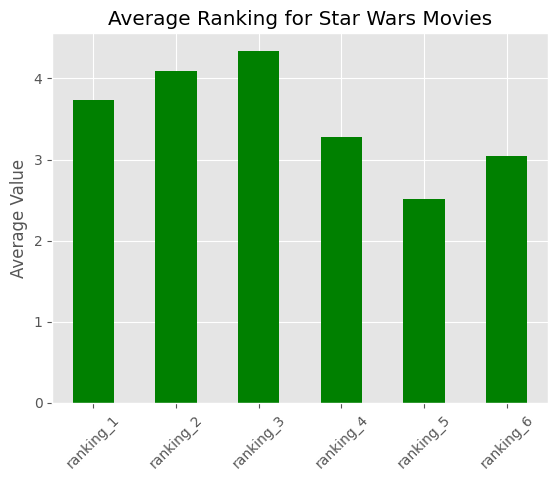

In [13]:
style.use('ggplot')

mean_ranking.plot.bar(color='green')
plt.title("Average Ranking for Star Wars Movies")
plt.ylabel("Average Value")
plt.xticks(rotation=45)

As we can recall that here highest ranking is `1` (most favorite) and lowest ranking is `6` (least favorite), from the above graph we depict that the *highly ranked movie has lowest average value* and *lowest ranked movie has highest average value*.  Below we list the movies from highest to lowest ranking.

1. ranking_5 (*Star Wars: Episode V The Empire Strikes Back*)
2. ranking_6 (*Star Wars: Episode VI Return of the Jedi*)
3. ranking_4 (*Star Wars: Episode IV A New Hope*)
4. ranking_1 (*Star Wars: Episode I The Phantom Menace*)
5. ranking_2 (*Star Wars: Episode II Attack of the Clones*)
6. ranking_3 (*Star Wars: Episode III Revenge of the Sith*)

*Episode V The Empire Strikes Back* is the most popular of all Star Wars Movies. It is ranked 1 by the respondents in our survey as well. Next most popular are *Episode IV A New Hope* and *Episode VI Return of the Jedi*, these are ranked Third and Second (not much difference in these values) respectively in our survey. Last three in the above list are also ranked in acordance with popularity except *Episode I Phantom Menace*, which is ranked last.   

## 6. Finding the Most Viewed Movie

In this section we are going to explore the six *seen* columns. We will calculate how many have actually seen these six movies using *df.sum()* method. Then we will plot them on the bar graph and compare it with average ranked bar graph. 

In [14]:
sum_seen = star_wars.loc[:, 'seen_1':'seen_6'].sum()
sum_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: object

Let us plot the bar chart for the *sum_seen* data.

Text(0, 0.5, 'Sum')

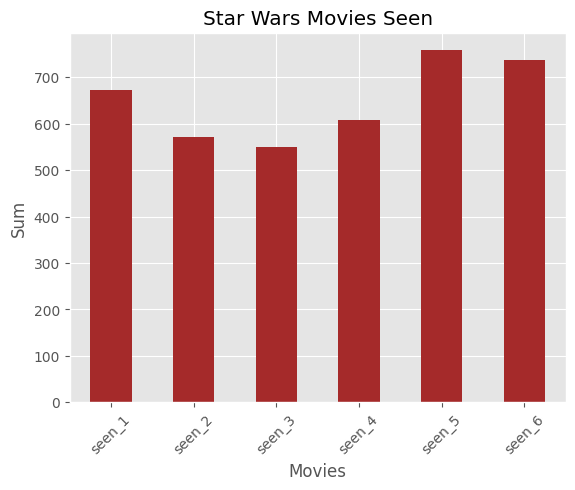

In [15]:
style.use('ggplot')
sum_seen.plot.bar(color='brown')
plt.title('Star Wars Movies Seen')
plt.xticks(rotation=45)
plt.xlabel("Movies")
plt.ylabel('Sum')

From the above bar chart it is clear that the highest watched movie is *Episode V The Empire Strikes Back*, this is also the highest ranked movie. Next most watched is the *Episode VI Return of the Jedi*, this is the third highest ranked movie.  Third most watched is *Episode I The Phantom Menace*, this is the fourth ranked movie. Fourth most watched movie is *Episode IV A New Hope*, this is the third ranked movie. *Episode II Attack of the Clones* and *Episode III Revenge of the Sith* are least watched movies and also lowest ranked movies. 

We assume that the ratings/viewings of these six Star Wars episodes are in conformation with popularity. Most viewed and ranked are the most popular ones and least viewd and ranked are least popular ones with a very slight difference in order of rankings/viewing.

## 7. Exploring the Data by Binary Segments

We observe that there are many columns which segment the data into two groups. In this section we will consider one of such columns and split them into two subsets and perform the previous two analysis (most viewed movie and highest ranked movie) on these two sub groups. 

We would consider *Gender* column for this purpose and split them into *male* and *female* subsets. Perform the analysis on them and compare the results.

In [16]:
#split the columns
males = star_wars[star_wars['Gender']=="Male"]
females = star_wars[star_wars['Gender']=='Female']

In [17]:
#find out the mean value of ranking columns for the male set
males_ranking = males.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Gender', aggfunc='mean')
males_ranking

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


In [18]:
#find out the mean value of ranking columns for the female subset
females_ranking = females.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Gender', aggfunc='mean')
females_ranking

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.95466,4.418136,3.544081,2.56927,3.078086


In [19]:
#calculate the sum of seen columns for the male set
males_seen = males.groupby('Gender')[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].agg('mean')
males_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


In [20]:
#calculate the sum of seen columns for the female set
females_seen = females.groupby('Gender')[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].agg('mean')
females_seen

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665


Further we will plot the results of our analysis and observe the graph.

[Text(0, 0, 'Female')]

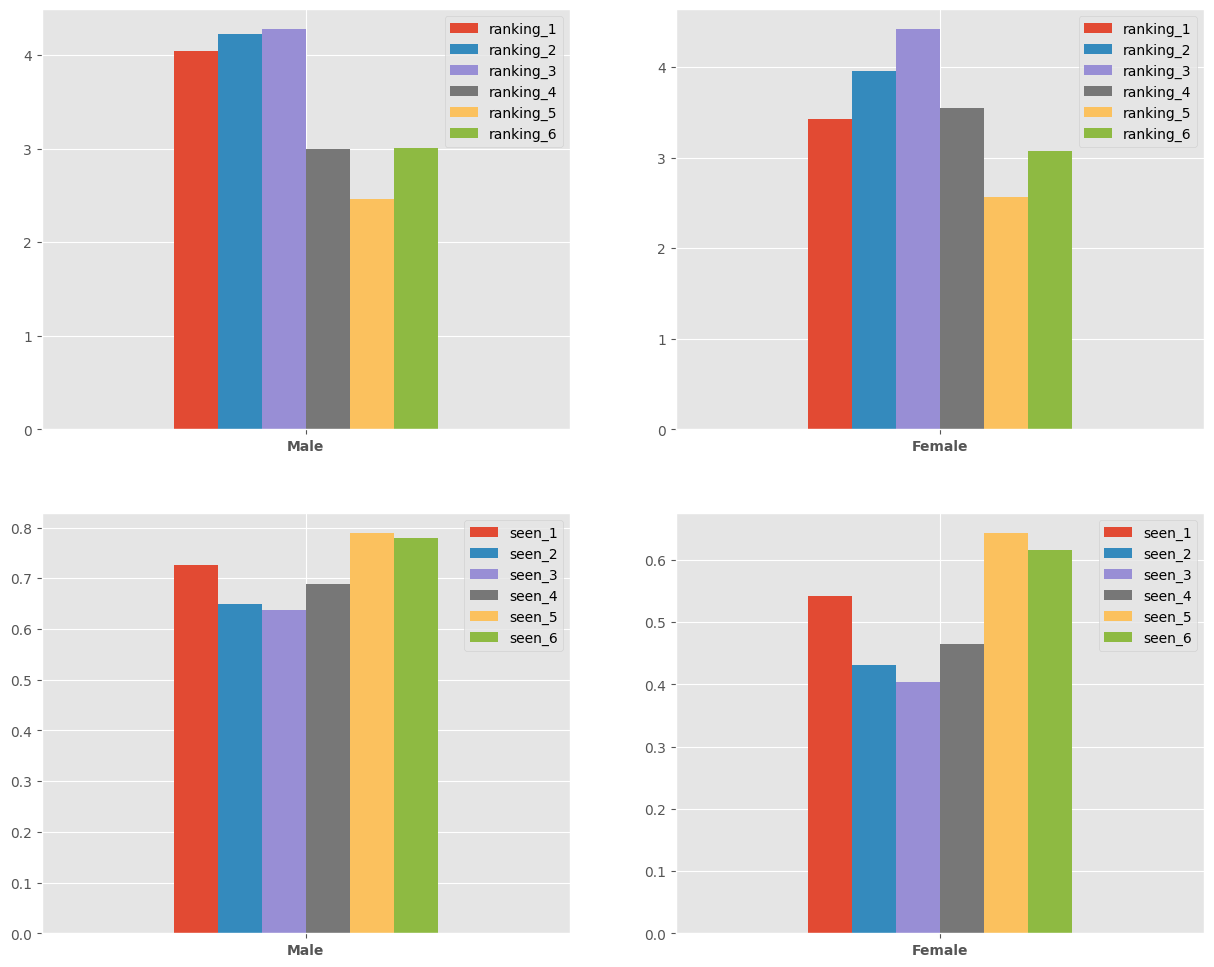

In [21]:
style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

males_ranking.plot(kind='bar', ax=axes[0,0])
females_ranking.plot(kind='bar', ax=axes[0,1])
males_seen.plot(kind='bar', ax=axes[1,0])
females_seen.plot(kind='bar', ax=axes[1,1])
axes[0,0].set_yticks([0, 1, 2, 3, 4])
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
# axes[0,0].set_ylabel('ranking', weight='bold')
# axes[1,0].set_ylabel('seen', weight='bold')
axes[0,0].set_xticklabels(['Male'], rotation=0, weight='bold')
axes[0,1].set_xticklabels(['Female'], rotation=0, weight='bold')
axes[1,0].set_xticklabels(['Male'], rotation=0, weight='bold')
axes[1,1].set_xticklabels(['Female'], rotation=0, weight='bold')


`From the above graph we deduce the following conclusions:-`

* Bar plot of average value of *ranking columns* follow same pattern for both male and female groups, eventhough differ in the frequncy count.
  
 -  Highest value is for *ranking_3 (Episode III Revenge of Sith)* i.e. least favorite and lowest value is for *ranking_5 (Episode V The Empire Strikes Back)* i.e. most favorite.
 
* Bar plot of sum of values for *seen columns* also follow the same pattern for both male and female groups and differ in frequency count.
 - Highest value is for *seen_5 (Episode V The Empire Strikes Back)* i.e. most seen of the respondents and the lowest value is for *seen_3 (Episode III Revenge of Sith)* i.e. least seen of the respondents.

## 8. Exploring the Data by Non-Binary Segments

In this section we will focus on the non-binary columns for example *Education*, *Location (Census Region)* and *Which character shot first?* etc. We would segment the data based on these columns and try finding interesting patterns.  

### 8.1 Education

In this subsection we will try to segment the data in the *Education* column. First we will apply the same operations as above i.e. calculating the average of ranking columns and calculating the sum of seen columns. Then we will plot the results and check for interesting patterns. 

In [22]:
#apply Series.value_counts() method & check how many unique values are there
star_wars['Education'].value_counts()

Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

We have total 5 unique values, out of these the last value *Less than high school degree* has only 7 counts, so we are not going to include it in our analysis. We will create a subset of each group and calculate the *average value* for *ranking* columns and *sum* of the all *seen* columns for each subset. Further we would make a bar plot of these for comparison purpose.

In [23]:
#create a subset of unique values
college_degree = star_wars[star_wars['Education']=='Some college or Associate degree']
Bachelor_degree = star_wars[star_wars['Education']=='Bachelor degree']
Graduate_degree = star_wars[star_wars['Education']=='Graduate degree']
High_school = star_wars[star_wars['Education']=='High school degree']

In [24]:
#calculate the average value of ranking columns using df.pivot_table() method
college_ranking = college_degree.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Education', aggfunc='mean')
Bachelor_ranking = Bachelor_degree.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Education', aggfunc='mean')
Graduate_ranking = Graduate_degree.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Education', aggfunc='mean')
High_school_ranking = High_school.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Education', aggfunc='mean')

Text(-0.45, 3.5, 'High School')

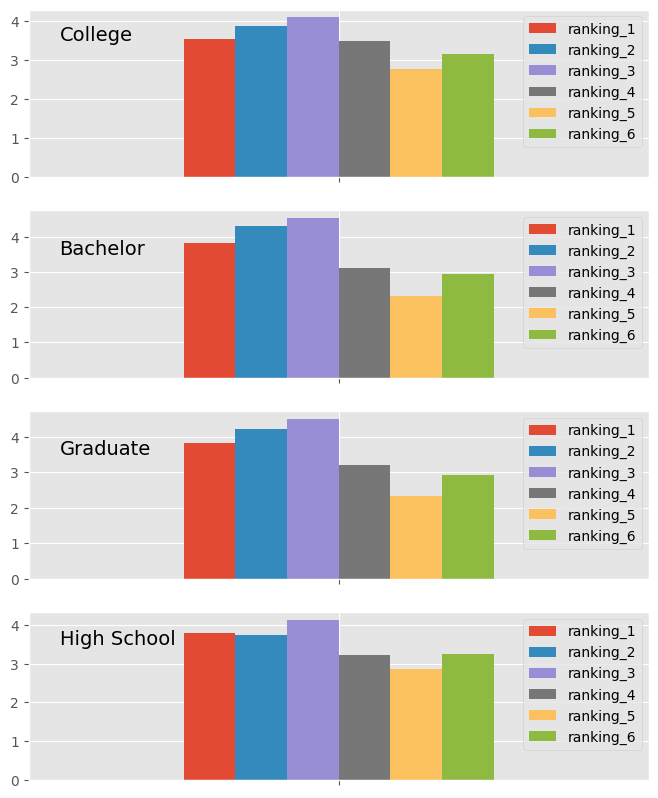

In [25]:
#make a bar plot of the above analysis
style.use('ggplot')

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

college_ranking.plot(kind='bar', ax=axes[0])
Bachelor_ranking.plot(kind='bar', ax=axes[1])
Graduate_ranking.plot(kind='bar', ax=axes[2])
High_school_ranking.plot(kind='bar', ax=axes[3])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[0].set_xticklabels('')
axes[1].set_xticklabels('')
axes[2].set_xticklabels('')
axes[3].set_xticklabels('')
axes[0].text(-0.45, 3.5, 'College', fontsize=14)
axes[1].text(-0.45, 3.5, 'Bachelor', fontsize=14)
axes[2].text(-0.45, 3.5, 'Graduate', fontsize=14)
axes[3].text(-0.45, 3.5, 'High School', fontsize=14)

In [26]:
#calculate the sum of all the seen columns using df.pivot_table() method
college_seen = college_degree.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Education', aggfunc='mean')
Bachelor_seen = Bachelor_degree.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Education', aggfunc='mean')
Graduate_seen = Graduate_degree.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Education', aggfunc='mean')
High_school_seen = High_school.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Education', aggfunc='mean')

Text(-0.45, 0.5, 'High School')

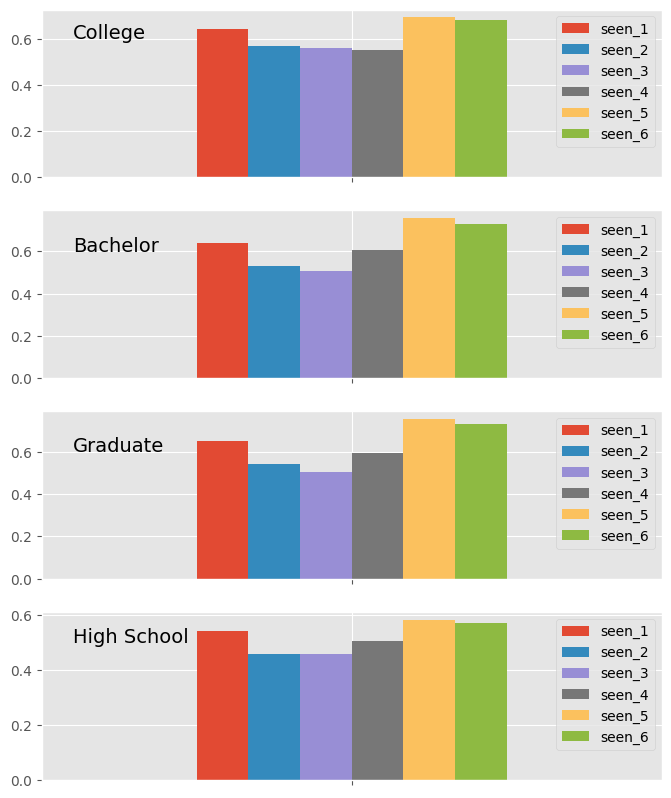

In [27]:
#create a bar plot of the above analysis
style.use('ggplot')

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

college_seen.plot(kind='bar', ax=axes[0])
Bachelor_seen.plot(kind='bar', ax=axes[1])
Graduate_seen.plot(kind='bar', ax=axes[2])
High_school_seen.plot(kind='bar', ax=axes[3])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[0].set_xticklabels('')
axes[1].set_xticklabels('')
axes[2].set_xticklabels('')
axes[3].set_xticklabels('')
axes[0].text(-0.45, 0.6, 'College', fontsize=14)
axes[1].text(-0.45,0.6, 'Bachelor', fontsize=14)
axes[2].text(-0.45, 0.6, 'Graduate', fontsize=14)
axes[3].text(-0.45, 0.5, 'High School', fontsize=14)

We observe a clear pattern among all the subsets in both *ranking* and *seen* column analysis. 

*Average value of ranking columns* for all the four subsets follow the same pattern *Episode V* with minimum value is highest ranked and *episode III* with maximum value is lowest ranked. Other 4 episodes also follow the same trend in the first three subsets except the last one (High School) with only slight difference in the ranking pattern. 

*Sum of seen columns* for all the four subsets follow the same pattern. *Episode V* with maximum value is the highest seen episode and *episode III* with lowest value is the less seen episode. Here remaining three episodes also follow the similar trend in all the four subsets.

### 8.2 Location (Census Region)

Let us first look at the unique values of Location column.

In [28]:
star_wars['Location (Census Region)'].value_counts()

Location (Census Region)
East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: count, dtype: int64

There are total 9 unique values. Four columns with total values less than 100. So we would only consider five unique values with total values more than 100. Let us create a subset of these five unique values.  

In [29]:
ENC = star_wars[star_wars['Location (Census Region)']=='East North Central']
Pacific = star_wars[star_wars['Location (Census Region)']=='Pacific']
South_atlntc = star_wars[star_wars['Location (Census Region)']=='South Atlantic']
Middle_atlntc = star_wars[star_wars['Location (Census Region)']=='Middle Atlantic']
WSC = star_wars[star_wars['Location (Census Region)']=='West South Central']

In [30]:
#calculate the average value of ranking columns for each subset using df.pivot_table() method
ENC_ranking = ENC.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Location (Census Region)', aggfunc='mean')
Pacific_ranking = Pacific.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Location (Census Region)', aggfunc='mean')
South_atlntc_ranking = South_atlntc.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Location (Census Region)', aggfunc='mean')
Middle_atlntc_ranking = Middle_atlntc.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Location (Census Region)', aggfunc='mean')
WSC_ranking = WSC.pivot_table(['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5','ranking_6'], 'Location (Census Region)', aggfunc='mean')

Text(-0.49, 3.8, 'West South Central')

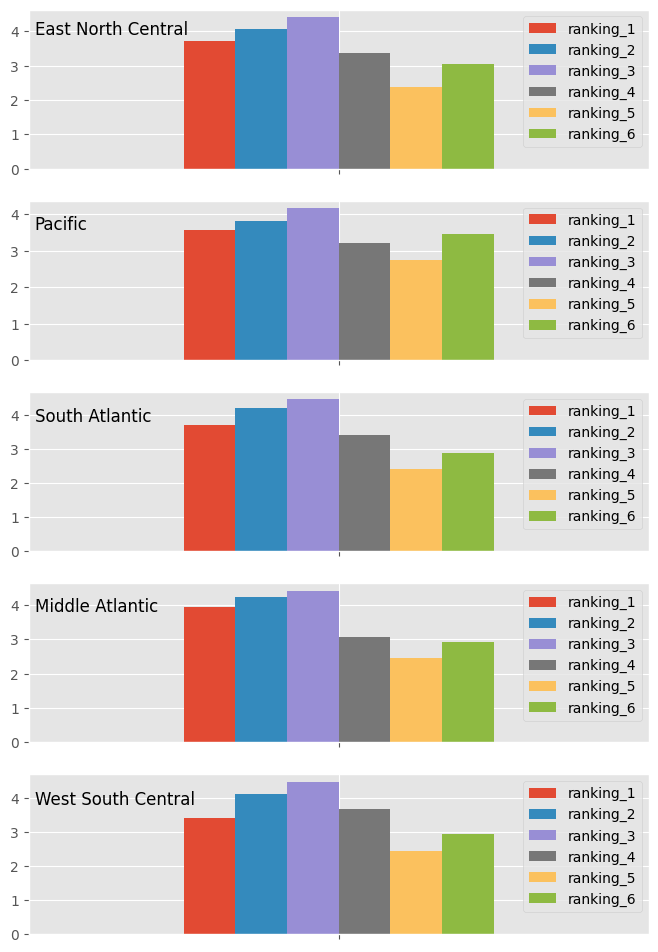

In [31]:
#make a bar plot of the above analysis
style.use('ggplot')

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

ENC_ranking.plot(kind='bar', ax=axes[0])
Pacific_ranking.plot(kind='bar', ax=axes[1])
South_atlntc_ranking.plot(kind='bar', ax=axes[2])
Middle_atlntc_ranking.plot(kind='bar', ax=axes[3])
WSC_ranking.plot(kind='bar', ax=axes[4])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[4].set_xlabel('')
axes[0].set_xticklabels('')
axes[1].set_xticklabels('')
axes[2].set_xticklabels('')
axes[3].set_xticklabels('')
axes[4].set_xticklabels('')
axes[0].text(-0.49, 3.9, 'East North Central', fontsize=12)
axes[1].text(-0.49, 3.6, 'Pacific', fontsize=12)
axes[2].text(-0.49, 3.8, 'South Atlantic', fontsize=12)
axes[3].text(-0.49, 3.8, 'Middle Atlantic', fontsize=12)
axes[4].text(-0.49, 3.8, 'West South Central', fontsize=12)

*Average value of ranking columns* follow the same trend for all the five subsets with *episode V* being the highest ranked episode to *episode III* being the lowest ranked episode.

Further we will look into *seen columns* and calculate the *sum* of these columns for each subset and plot them. 

In [32]:
ENC_seen = ENC.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Location (Census Region)', aggfunc='mean')
Pacific_seen = Pacific.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Location (Census Region)', aggfunc='mean')
South_atlntc_seen = South_atlntc.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Location (Census Region)', aggfunc='mean')
Middle_atlntc_seen = Middle_atlntc.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Location (Census Region)', aggfunc='mean')
WSC_seen = WSC.pivot_table(['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6'], 'Location (Census Region)', aggfunc='mean')

Text(-0.49, 0.58, 'West South Central')

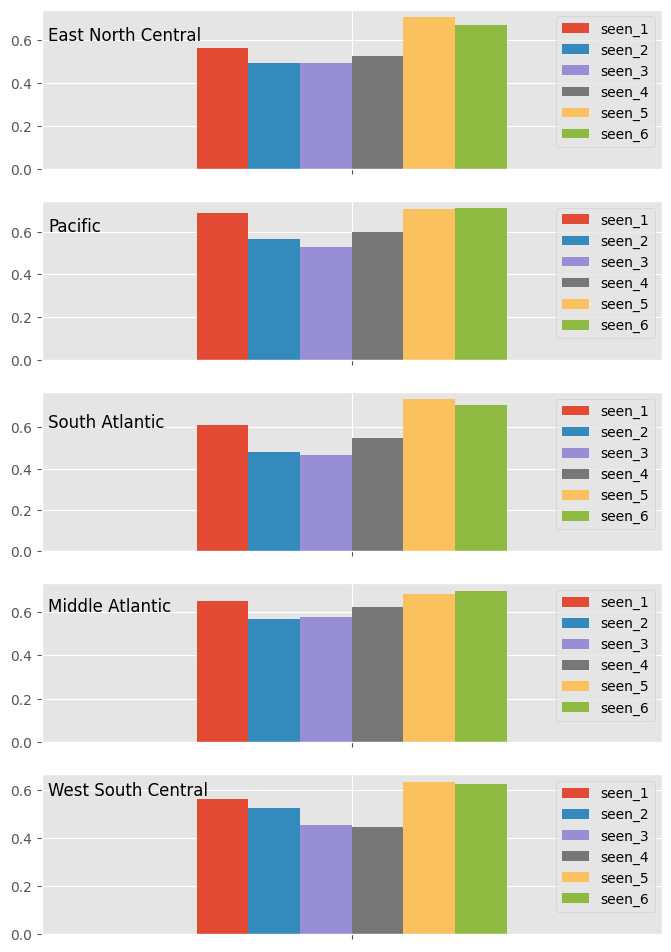

In [33]:
#make a bar plot of the above analysis
style.use('ggplot')

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

ENC_seen.plot(kind='bar', ax=axes[0])
Pacific_seen.plot(kind='bar', ax=axes[1])
South_atlntc_seen.plot(kind='bar', ax=axes[2])
Middle_atlntc_seen.plot(kind='bar', ax=axes[3])
WSC_seen.plot(kind='bar', ax=axes[4])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[4].set_xlabel('')
axes[0].set_xticklabels('')
axes[1].set_xticklabels('')
axes[2].set_xticklabels('')
axes[3].set_xticklabels('')
axes[4].set_xticklabels('')
axes[0].text(-0.49, 0.6, 'East North Central', fontsize=12)
axes[1].text(-0.49, 0.6, 'Pacific', fontsize=12)
axes[2].text(-0.49, 0.6, 'South Atlantic', fontsize=12)
axes[3].text(-0.49, 0.6, 'Middle Atlantic', fontsize=12)
axes[4].text(-0.49, 0.58, 'West South Central', fontsize=12)

From the above graph we observe that in *Pacific* and *Middle Atlantic*, *Episode VI* is the most viewed and in other regions *Episode V* is the most watched. In four of the subsets *Episode III (in two of the subsets, Episode II and Episode III are equivalent)*  is least watched except *West South Central* where *Episode IV* is the least viewed one (almost equivalent to Episode III). 

### 8.3. Which Character Shot First?

In here we are going to investigate the column *which character shot first?*. Let us see how many unique values are there in this column.

In [34]:
#apply df.value_counts() method 
star_wars['Which character shot first?'].value_counts()

Which character shot first?
Han                                 325
I don't understand this question    306
Greedo                              197
Name: count, dtype: int64

As we can see above we have *3* unique values in this column. Among these we can neglect the value *I don't understand this question*. So we have two unique values.

 - *Han* with 325 counts

 - *Greedo* with 197 counts 

325 respondents answered *Han* and 197 respondents answered *Greedo*. So we conclude that *Han shot first*.

## 9. Exploring Characters by Respondets View

Below we will explore columns *15* to *29*, which contain data on the characters respondents view favorably and unfavorably. First let us look at these columns.

In [35]:
star_wars.iloc[:, 15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably
1182,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very unfavorably,Somewhat favorably,Unfamiliar (N/A),Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably
1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1184,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Very favorably


Each column represents a character. This information is availaible in the main file. We will rename each column with corresponding character names.

In [36]:
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker", 
    "Unnamed: 17": "Princess Leia Organa",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3PO",
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda"    
})

In [37]:
#let us consider only the columns we need for analysis and name it star_char
star_char = star_wars.iloc[:,15:29]

#let us look at the dataset in order to confirm the changes we have made 
star_char.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Below we will build a table with counts of each value in the column using *pd.Series.value_counts()* method. We will use *df.apply()* in order to count the values of all the columns in the dataset. 

In [38]:
char_value = star_char.apply(pd.Series.value_counts)
char_value

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Neither favorably nor unfavorably (neutral),44,38,48,135,43,213,84,236,248,79,57,164,207,51
Somewhat favorably,151,219,210,269,159,143,171,223,153,229,185,130,183,144
Somewhat unfavorably,8,13,12,83,8,68,102,63,96,23,10,102,58,8
Unfamiliar (N/A),15,6,8,52,17,156,10,148,132,15,10,109,164,10
Very favorably,610,552,547,245,591,110,310,142,138,474,562,112,168,605
Very unfavorably,1,3,6,39,7,124,149,8,45,7,6,204,34,8


`We have built a table looking at which we can answer following questions:-`

1. Which character do respondents like the most? 
   
   **The character `Han Solo` with *610*  counts is the most favorite character      followed very closely by `Yoda` with *605* counts.**
   
   
2. Which character do the respondents dislike the most?
    
    **The character `Jar Jar Binks` is the most disliked character with *204*       counts.**
   
   
3. Which character is the most controversial?
    **The character `Emperor Palpatine` is the most controversial (split             between likes and dislikes) with *110 likes* and *124 dislikes*.** 

## Conclusions

In this project we analyzed the survey conducted on 835 respondents/fans of 6 main *Star Wars* movies. The main objective of the project is to find out if *Episode V The Empire Strikes Back* is the favorite movie of all the six movies. 

The dataset has 38 columns. Some of the columns have questions with Yes/No answers as values, which we converted into *Boolean Types*. We renamed six of the *unnamed* columns as *ranking* columns and converted the values into *float type*. We also renamed six other *unnamed* columns as *seen* columns and converted the values into Boolean types.

**From our analysis we draw following conclusions:-**
 - Analysis done on six *ranking* columns corresponding to six *Star Wars* movies exhibits that *Episode V The Empire Strikes Back* is the highest ranked movie.
 
 - We analyzed the six *seen* columns and found that *Episode V The Empire Strikes Back* is the most watched movie of all.
 
 - `Exploring Binary Data:-` We seperated the gender columns into *males* and *females* in order to analyze the *seen* and *ranked* columns. We found that *Episode V The Empire Strikes Back* is the highest ranked and most watched film in both the segments.
 
 - `Exploring the Data by Non-Binary Segments:-` 
   - `Education:` We divided the Education column into four segments, *College*, *Bachelor*, *Graduate* & *High School* inorder to analyze the *seen* and *ranking* columns of each segment. These analysis show that *Episode V The Empire Strikes Back* is the highest ranked and most watched among all the four segments.
   - `Location (Census Region):` We divided the *Location (Census Region)* column into five segments, *East North Central(ENC)*, *Pacific*, *South Atlantic*, *Middle Atlantic* & *West South Central(WSC)* in order to analyze the *ranking* and *seen* columns of each segment. We observe that *Episode V The Empire Strikes Back* is highest ranked movie. In *Pacific* and *Middle Atlantic*, *Episode VI Return of the Jedi* is the most watched movie but in others *Episode V The Empire Strikes Back* is the most viewed movie.
   - `Which character shot first?:` Our analysis showed that *Han Solo* shot first with highest number of counts.
  
 - We cleaned the 15 character columns by renaming them with respective character names. We observe the following results.
  - Character *Han Solo* is the most favorite closely followed by *Yoda*.
  - Character *Jar Jar Binks* is the most disliked character.
  - Character *Emperor Palpatime* is the most controversial (split between likes & dislikes) character.